In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os

In [3]:
img_localpath = './einstein.png'
img_abspath = os.path.abspath(img_localpath)

img_abspath

'/Users/wadhondt/Documents/master_2/advanced_esb/einstein.png'

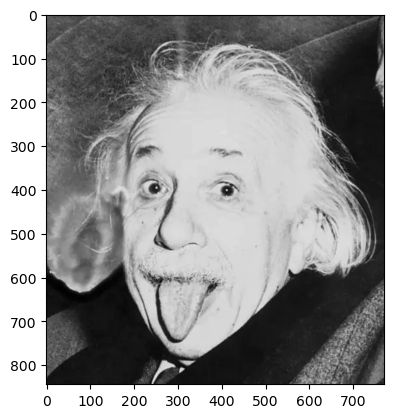

In [5]:
einstein = cv2.imread(img_abspath, cv2.IMREAD_GRAYSCALE)
plt.imshow(einstein, cmap='gray')

In [6]:
einstein.shape

(844, 770)

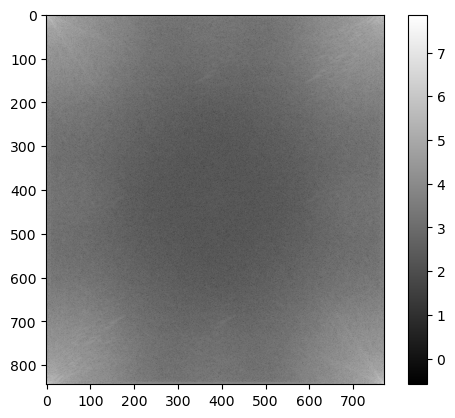

In [114]:
einstein_ft = np.fft.fftn(einstein)
einstein_ft_amps = np.abs(einstein_ft)
m = plt.imshow(np.log10(einstein_ft_amps), cmap='gray')
plt.colorbar(m)

Create a spherical low-pass filter of radius 250px

In [106]:
def make_spherical_mask(radius: 250, array_size = (500, 500)):
    n, m = array_size
    xgrid, ygrid = np.mgrid[0:n, 0:m]
    circle = (xgrid - n//2)**2 + (ygrid - m//2)**2
    mask = np.array(circle < radius**2, dtype=int).astype(complex)
    return mask 
    
einstein_mask = make_spherical_mask(radius=400, array_size=einstein.shape)

Text(0.5, 1.0, 'High-pass filter')

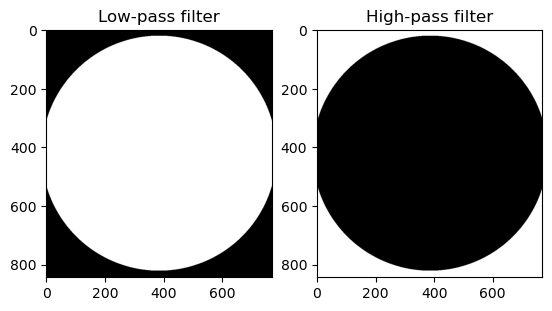

In [110]:
fig = plt.figure()
gs = GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax1.imshow(abs(einstein_mask), cmap='gray')
ax2.imshow(abs(1-einstein_mask), cmap='gray')
ax1.set_title("Low-pass filter")
ax2.set_title("High-pass filter")

Text(0.5, 1.0, 'High-pass filtered')

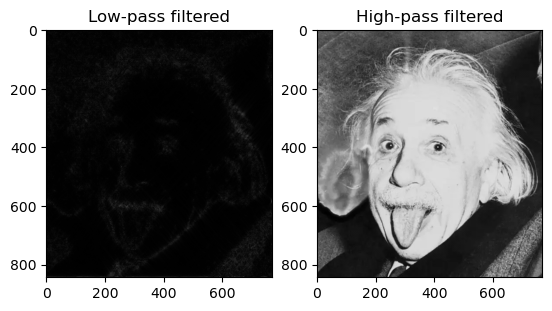

In [109]:
einstein_ft_lowpass = einstein_ft * einstein_mask
einstein_ft_highpass = einstein_ft * (1 - einstein_mask)

einstein_real_lowpass = np.fft.ifftn(einstein_ft_lowpass)
einstein_real_highpass = np.fft.ifftn(einstein_ft_highpass)

fig = plt.figure()
gs = GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax1.imshow(abs(einstein_real_lowpass), cmap='gray')
ax2.imshow(abs(einstein_real_highpass), cmap='gray')
ax1.set_title('Low-pass filtered')
ax2.set_title('High-pass filtered')